# 各种流变模型的模拟数据生成

## 生成幂律模型的应力应变数据
$$\sigma=K\gamma^n$$


+ 导包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

+ 定义公共对象

In [2]:
# 创建Excel写入器
writer = pd.ExcelWriter('data/power_law_data.xlsx', engine='xlsxwriter')
# 获取xlsxwriter工作簿和工作表对象
workbook = writer.book
# 定义格式
format1 = workbook.add_format({'num_format': '0.000000000000000'})

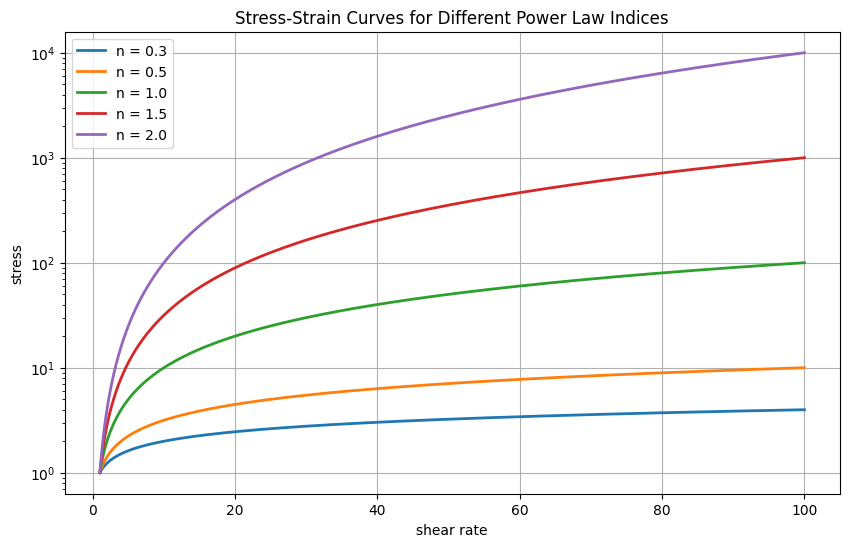

In [3]:
# 参数
K = 1.0  # 材料常数
n_values = [0.3, 0.5, 1.0, 1.5, 2.0]  # 幂律指数列表
epsilon_max = 100  # 最大剪切率
num_points = 10000   # 数据点数量

# 生成应变数据
epsilon = np.linspace(1, epsilon_max, num_points)

# 获取当前Jupyter Notebook文件的绝对路径

# 绘制应力-应变曲线
plt.figure(figsize=(10, 6))

for n in n_values:
    # 根据幂律模型生成应力数据
    sigma = K * epsilon**n
   
    # 创建DataFrame
    data = pd.DataFrame({'shear rate': epsilon, 'stress': sigma,'n':[n]*len(sigma)})
    
    # 将数据写入Excel文件的不同工作簿
    data.to_excel(writer, sheet_name=f'n={n}', index=False, float_format='%.15f')
    
    # 绘制曲线
    plt.plot(epsilon, sigma, label=f'n = {n}', linewidth=2)

# 保存Excel文件
writer.close()

plt.xlabel('shear rate')
plt.ylabel('stress')
plt.yscale('log')
plt.title('Stress-Strain Curves for Different Power Law Indices')
plt.legend()
plt.grid(True)
plt.show()

## 生成宾汉塑性流体模型
$$\sigma=\sigma_0+K\gamma^n$$

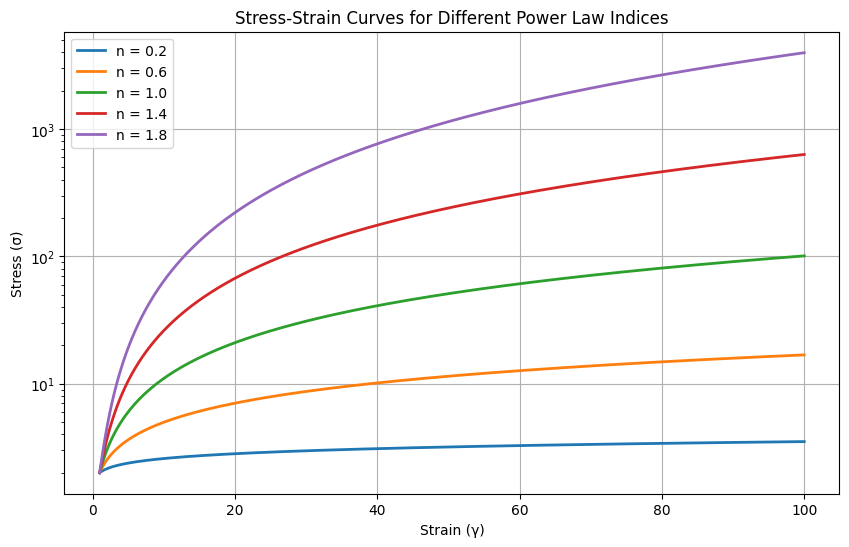

In [2]:
# 参数
K = 1.0  # 材料常数
n_values = [0.2, 0.6, 1.0, 1.4, 1.8]  # 幂律指数列表
epsilon_max = 100  # 最大应变
num_points = 10000   # 数据点数量
sigma0=1
# 生成应变数据
epsilon = np.linspace(1, epsilon_max, num_points)

# 创建Excel写入器
writer = pd.ExcelWriter('data/bingham_data.xlsx', engine='xlsxwriter')

# 绘制应力-应变曲线
plt.figure(figsize=(10, 6))

for n in n_values:
    # 根据幂律模型生成应力数据
    sigma = sigma0+K * epsilon**n
    
    # 创建DataFrame
    data = pd.DataFrame({'shear rate': epsilon, 'stress': sigma,'n':[n]*len(sigma)})
    
    # 将数据写入Excel文件的不同工作簿
    data.to_excel(writer, sheet_name=f'n={n}', index=False, float_format='%.15f')
    # 绘制曲线
    plt.plot(epsilon, sigma, label=f'n = {n}', linewidth=2)

# 保存Excel文件
writer.close()

plt.xlabel('Strain (γ)')
plt.ylabel('Stress (σ)')
plt.yscale('log')
plt.title('Stress-Strain Curves for Different Power Law Indices')
plt.legend()
plt.grid(True)
plt.show()

+ 测试一下数据的精度

In [44]:
# 读取Excel文件
file_path = 'data/bingham_data.xlsx'
df = pd.read_excel(file_path, sheet_name=0)  # 读取第一个工作簿

# 打印前10行数据
print(df.head(10))

   Strain (γ)  Stress (σ)
0    1.000000    2.000000
1    1.009901    2.001972
2    1.019802    2.003929
3    1.029703    2.005871
4    1.039604    2.007798
5    1.049505    2.009711
6    1.059406    2.011609
7    1.069307    2.013492
8    1.079208    2.015362
9    1.089109    2.017219


## 简单MaxWell模型

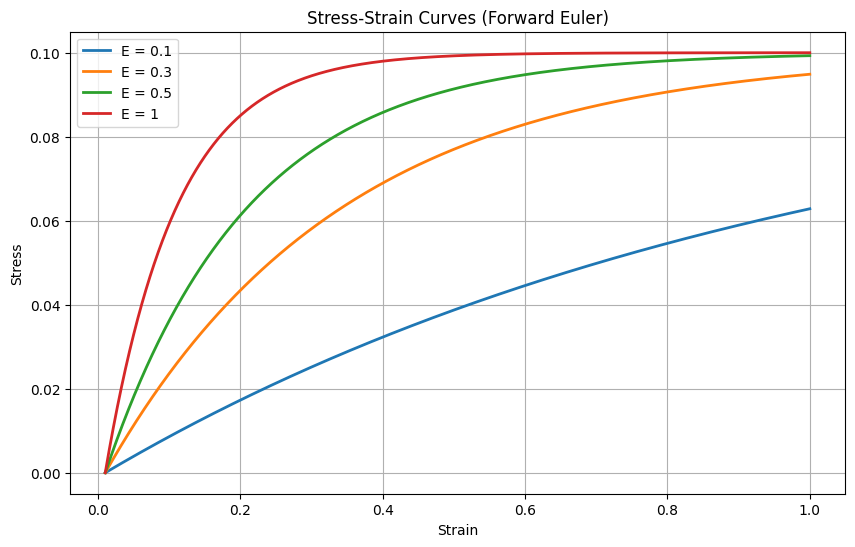

In [4]:
# 定义 calc_stress 函数
def calc_stress(E, eta, max_strain, strain_rate, N):
    time = np.linspace(0.1,  max_strain / strain_rate, N)
    strain = np.zeros(N)
    for i in range(N):
        if time[i] < max_strain / strain_rate:
            strain[i] = strain_rate * time[i]
        else:
            strain[i] = max_strain - (time[i] - max_strain / strain_rate) * strain_rate
    
    stress = np.zeros(N)
    for i in range(1, N):
        de = strain[i] - strain[i-1]
        dt = time[i] - time[i-1]
        stress[i] = (1 - dt / (eta / E)) * stress[i-1] + E * de
    
    return time, strain, stress

# 参数
E_values = [0.1, 0.3, 0.5, 1]  # 弹性模量列表
eta = 1  # 粘性系数
max_strain = 1  # 最大应变
strain_rate = 0.1  # 应变率
N = 10000  # 时间步数

# 创建Excel写入器
writer = pd.ExcelWriter('data/simple_maxwell_data.xlsx', engine='xlsxwriter')

# 绘制应力-应变曲线
plt.figure(figsize=(10, 6))

for E in E_values:
    # 计算应力-应变数据
    time, strain, stress = calc_stress(E, eta, max_strain, strain_rate, N)
    
    # 创建DataFrame
    data = pd.DataFrame({'Strain': strain, 'Stress': 10*stress,'n':[E]*len(stress)})
    
    # 将数据写入Excel文件的不同工作簿
    data.to_excel(writer, sheet_name=f'E={E}', index=False)
    
    # 绘制曲线
    plt.plot(strain, stress, label=f'E = {E}', linewidth=2)

# 保存Excel文件
writer.close()

plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Stress-Strain Curves (Forward Euler)')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# 读取Excel文件
file_path = 'data/simple_maxwell_data.xlsx'
df = pd.read_excel(file_path, sheet_name=0)  # 读取第一个工作簿

# 打印前10行数据
print(df.head(10))

   Strain   Stress
0  0.0000  0.00000
1  0.0001  0.00001
2  0.0002  0.00002
3  0.0003  0.00003
4  0.0004  0.00004
5  0.0005  0.00005
6  0.0006  0.00006
7  0.0007  0.00007
8  0.0008  0.00008
9  0.0009  0.00009


# 交变应力MaxWell模型

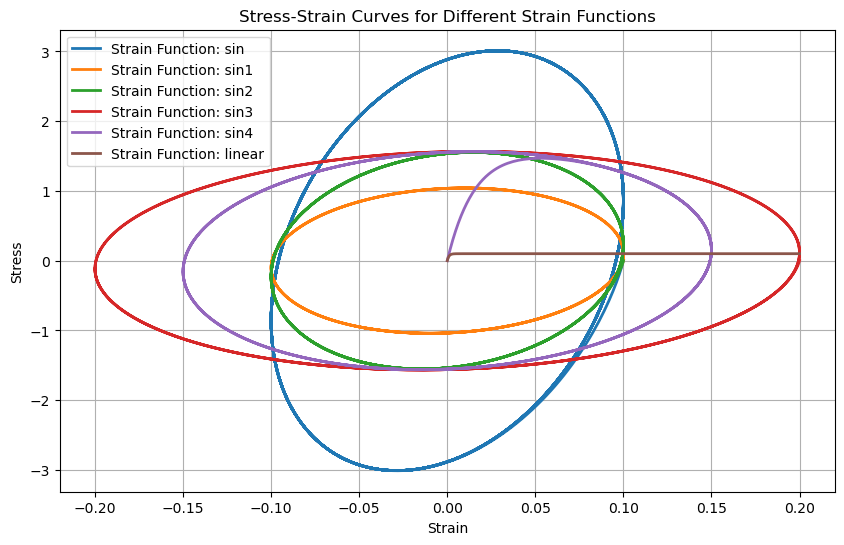

In [7]:
# 定义 calc_stress 函数
def calc_stress(E, eta, strain_func, N, T):
    """
    计算应力和应变
    :param E: 弹性模量
    :param eta: 粘性系数
    :param strain_func: 应变函数，输入为时间，输出为应变
    :param N: 时间步数
    :param T: 总时间
    :return: 时间序列, 应变序列, 应力序列
    """
    time = np.linspace(0, T, N)  # 生成时间序列
    strain = strain_func(time)  # 根据应变函数生成应变序列
    strain_rate=np.zeros(N)
    stress = np.zeros(N)  # 初始化应力序列
    for i in range(1, N):
        de = strain[i] - strain[i-1]  # 应变增量
        dt = time[i] - time[i-1]  # 时间增量
        stress[i] = ((1 - dt / (eta / E)) * stress[i-1] + E * de)  # 计算应力
        strain_rate[i]=de/dt
    
    return time, strain, stress*100,strain_rate

# 定义不同的应变函数
def strain_sin(time):
    """ 正弦应变函数 """
    return epsilon_0 * np.cos(omega * time)

def strain_sin1(time):
  
   return epsilon_0 * np.cos(omega * time/3)

def strain_sin2(time):
    
    return epsilon_0 * np.cos(omega * time/2)
def strain_sin3(time):
    return 2*epsilon_0 * np.cos(omega * time/4)
def strain_sin4(time):
    return 1.5*epsilon_0 * np.sin(omega * time/3)
def strain_linear(time):
    return  epsilon_0 * time/10  # 线性增加的应变
# 参数
E = 1.0  # 弹性模量
eta = 0.1  # 粘性系数
epsilon_0 = 0.1  # 最大应变
omega = np.pi  # 角频率
T = 2 * np.pi / omega  # 周期
N = 2000  # 时间步数

# 创建Excel写入器
writer = pd.ExcelWriter('data/sin_maxwell_protocols_data.xlsx', engine='xlsxwriter')

# 绘制应力-应变曲线
plt.figure(figsize=(10, 6))

# 定义应变函数列表
strain_functions = [
    ("sin", strain_sin),
    ("sin1", strain_sin1),
    ("sin2", strain_sin2),
    ("sin3", strain_sin3),
    ("sin4",strain_sin4),
    ("linear",strain_linear)
]
n=1
for name, strain_func in strain_functions:
    # 计算应力-应变数据
    time, strain, stress,strain_rate = calc_stress(E, eta, strain_func, N, 10 * T)
    
    # 创建DataFrame
    data = pd.DataFrame({'Time': time, 'Strain': strain, 'Stress': stress,'n':[n]*len(time),'Strain_rate':strain_rate})
    n=n+1
    # 将数据写入Excel文件的不同工作簿
    data.to_excel(writer, sheet_name=name, index=False)
    
    # 绘制曲线
    plt.plot(strain, stress, label=f'Strain Function: {name}', linewidth=2)

# 保存Excel文件
writer.close()

plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Stress-Strain Curves for Different Strain Functions')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# 读取Excel文件
file_path = 'data/sin_maxwell_data.xlsx'
df = pd.read_excel(file_path, sheet_name=0)  # 读取第一个工作簿

# 打印前10行数据
print(df.head(10))

FileNotFoundError: [Errno 2] No such file or directory: 'data/sin_maxwell_data.xlsx'